In [1]:
#Take the number of vertices
import networkx as nx
n=int(input("Enter number of Vertices : "))
G= nx.erdos_renyi_graph(n,0.1)

Enter number of Vertices : 5


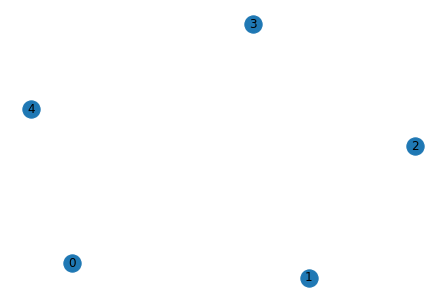

In [3]:
#Create a random Graph using networkx with a probability of 0.1 of having an edge.
import matplotlib.pyplot as plt
nx.draw(G, with_labels=True)
plt.show()

In [4]:
#Function to randomly add an edge from a given list of non edges
def random_edge(graph):
    nonedges = list(nx.non_edges(graph))
    chosen_nonedge = random.choice(nonedges)
    graph.add_edge(chosen_nonedge[0], chosen_nonedge[1])

    return graph

In [5]:
#Function to Check whether the degree of all the under number of vertices/2
#The condition that the degree is greater than 1 is checked when we check for a connected graph.
def checkdegrees(G):
    flag=0
    my_degrees=G.degree()
    for i in my_degrees:
        if i[1]>n/2:
            flag=1
    return flag

In [6]:
# Drawing the graph. Add the edge which is not connected. Check whether there is any change in the degree constraint of
# every node. Run a while loop until the random nodes are added such that the graph is connected and degrees are between
# 1 and number of vertices/2.
import random
while nx.is_connected(G)==False:
    T=G.copy()
    new_graph = random_edge(G)
    flag=checkdegrees(new_graph)
    if flag!=1:
        T=G.copy()
    elif flag==1:
        G=T.copy()

C:\Users\V.Bhat\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


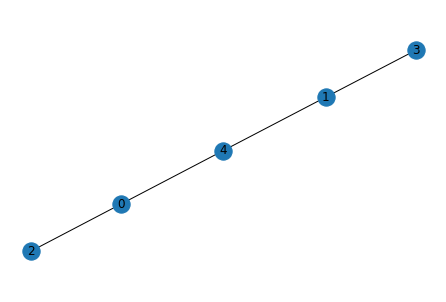

In [7]:
#Draw the generated graph
nx.draw(G, with_labels=True)

In [8]:
A = nx.adjacency_matrix(G)
adjacency=A.todense()

In [9]:
#Printing the adjacency matrix to ensure our conditions are met
#The matrix should contain number of 1's in every row less than number of vertices/2
print(adjacency)

[[0 0 1 0 1]
 [0 0 0 1 1]
 [1 0 0 0 0]
 [0 1 0 0 0]
 [1 1 0 0 0]]


In [10]:
from gurobipy import *
m = Model("Vertex Cover Solution")

Using license file C:\Users\V.Bhat\gurobi.lic
Academic license - for non-commercial use only


In [11]:
#This would contain the final solution i.e. the vertices which we would be selecting.
C = []
for i in range(n):
    v = m.addVar(lb=0, ub=1, vtype=GRB.BINARY, name=str(i))
    C.append(v)

In [12]:
#We have to minimize the sum of the number of vertices we selected.Hence it will be our objective function.
obj = 0
for i in C:
    obj = obj + i

m.setObjective(obj, GRB.MINIMIZE)

In [13]:
#Now we add the constraint that we have to cover every edge in the graph
for edge in G.edges():
    i = edge[0]
    j = edge[1]
    x_u = C[i]
    x_v = C[j]
    m.addConstr(x_u + x_v >= 1, "Main Constraint")

In [14]:
m.optimize()

Gurobi Optimizer version 9.0.2 build v9.0.2rc0 (win64)
Optimize a model with 4 rows, 5 columns and 8 nonzeros
Model fingerprint: 0xa6bfb4d8
Variable types: 0 continuous, 5 integer (5 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 3.0000000
Presolve removed 4 rows and 5 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.02 seconds
Thread count was 1 (of 8 available processors)

Solution count 2: 2 

Optimal solution found (tolerance 1.00e-04)
Best objective 2.000000000000e+00, best bound 2.000000000000e+00, gap 0.0000%


In [18]:
#To check which vertex it selected
for i in C:
    print(i.x)
#The solution gives 1 for the ith node. So if we get 1 in the 1st line, it means the 0th node is selected.
#Which then we have to check from the graph where the node is located

1.0
1.0
0.0
0.0
0.0


In [19]:
#Print the count of vertex cover
count=0
for i in C:
    if int(i.x)==1:
        count=count+1

print("Total number of vertex in cover : "+str(count))

Total number of vertex in cover : 2
